# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 4</font>
***

## Trabalho sobre correlação e regressão

Utilizando os conhecimentos adquiridos em nosso treinamento realize a análise de regressão proposta abaixo.

Siga o roteiro proposto e vá completando as células vazias.

# <font color=green>DATASET DO PROJETO</font>
***

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

### Dados:
- **temp_media** - Temperatura Média (°C)
- **consumo** - Consumo de Cerveja (litros)


---

### Solução do problema com dependência do statsmodels

In [0]:
#!pip install scipy==1.2 --upgrade

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, scipy, statsmodels</font>

In [52]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot

### Importe o dataset

In [6]:
df = pd.read_csv('dados_projeto.csv', sep=';')

### Visualize o conteúdo do DataFrame

In [7]:
df.head()

,Y,X
0,25461,27.30
1,28972,27.02
2,30814,24.82
3,29799,23.98
4,28900,23.82


In [4]:
df.shape

(365, 1)

### Obtenha e avalie as estatísticas descritivas dos dados

In [8]:
df.describe()

,Y,X
count,365.000000,365.000000
mean,25401.367123,21.226356
std,4399.142703,3.180108
min,14343.000000,12.900000
25%,22008.000000,19.020000
50%,24867.000000,21.380000
75%,28631.000000,23.280000
max,37937.000000,28.860000


### Análise gráfica
### Construa um box plot para cada variável do dataset

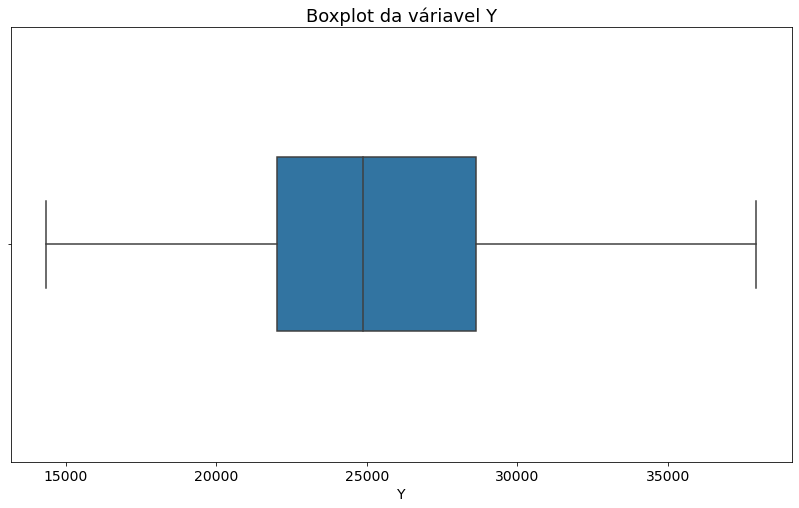

In [75]:
fig, ax = plt.subplots(figsize=(14,8))
ax.set_title('Boxplot da váriavel Y', fontsize=18)
ax.set_xlabel('Y', fontsize=14)
sns.boxplot(x= 'Y', data= df, orient='h', ax=ax, width=0.4)
ax.tick_params(labelsize=14)
plt.show()

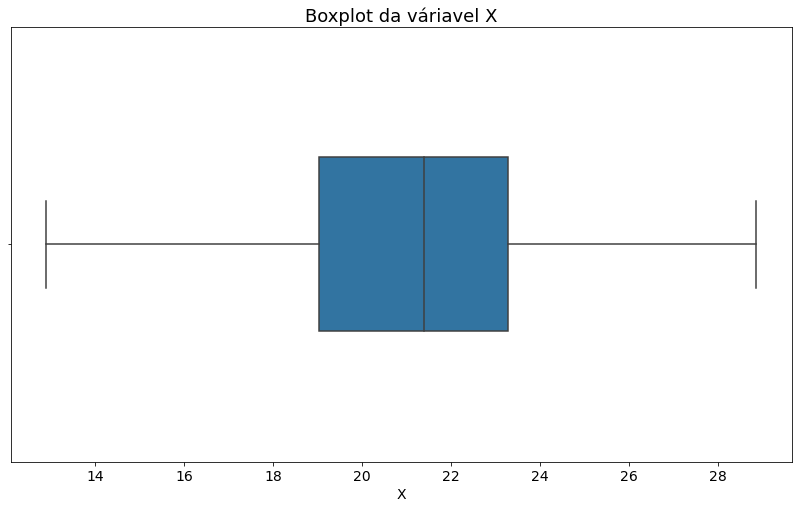

In [76]:
fig, ax = plt.subplots(figsize=(14,8))
ax.set_title('Boxplot da váriavel X', fontsize=18)
ax.set_xlabel('X', fontsize=14)
sns.boxplot(x= 'X', data= df, orient='h', ax=ax, width=0.4)
ax.tick_params(labelsize=14)
plt.show()

### Identifique se existe uma relação linear entre as variáveis $Y$ e $X$
### <font color='red'>Utilizando o método gráfico</font>

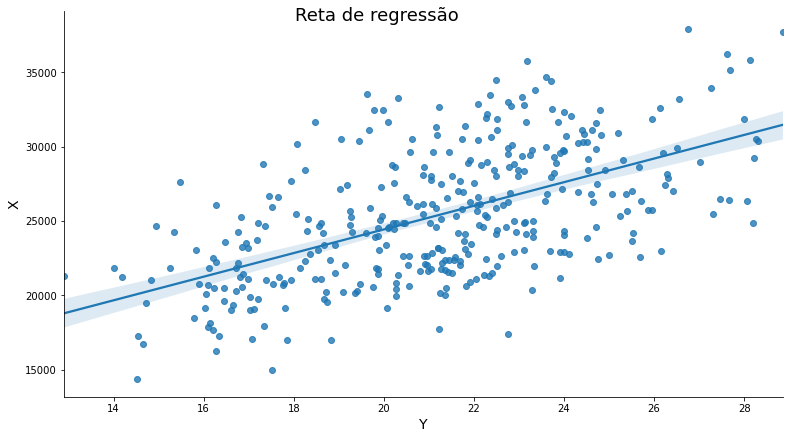

In [33]:
ax = sns.lmplot(x= 'X', y='Y', data= df)
ax.fig.suptitle('Reta de regressão', fontsize=18)
ax.fig.set_size_inches(12,6)
ax.set_xlabels('Y', fontsize=14)
ax.set_ylabels('X', fontsize=14)

plt.show()

### <font color='red'>Utilizando a matriz de correlação</font>

In [19]:
df.corr()

,Y,X
Y,1.000000,0.574615
X,0.574615,1.000000


### Avalie os resultados acima:

É possível afirmar que existe uma relação linear entre as variáveis?

Resp.: <font color='red'>Sim</font>

É possível quantificar a intensidade dessa relação?

Resp.: <font color='red'>Sim, pela matriz acima</font>

É possível afirmar que existe uma relação de causalidade entre $Y$ e $X$ a partir dos resultados da matriz de correlação?

Resp.:<font color='red'>Não</font>

### Prepare os dados para estimar um modelo de regressão linear simples

In [36]:
Y = df.Y
X = sm.add_constant(df.X)

### Estime o modelo de regressão linear simples

In [37]:
model = sm.OLS(Y, X, missing='drop').fit()

### Visualize o resultado da regressão

In [39]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     178.9
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           1.87e-33
Time:                        01:55:03   Log-Likelihood:                -3506.3
No. Observations:                 365   AIC:                             7017.
Df Residuals:                     363   BIC:                             7024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8528.9073   1275.363      6.687      0.0

### Obtenha o $Y$ previsto

In [38]:
df['Y_pred'] = model.predict()
df.head()

,Y,X,Y_pred
0,25461,27.30,30229.200544
1,28972,27.02,30006.633434
2,30814,24.82,28257.891852
3,29799,23.98,27590.190521
4,28900,23.82,27463.009315


### Utilizando nosso modelo estimado para fazer previsões.
### Qual seria o consumo de cerveja para um dia com temperatura média de 42° C?

In [44]:
(f'{model.predict([1, 42])[0]:0.2f} Litros')

'41913.97 Litros'

### Obtenha os resíduos da regressão

In [46]:
df['residuo'] = model.resid
df.head()

,Y,X,Y_pred,residuo
0,25461,27.30,30229.200544,-4768.200544
1,28972,27.02,30006.633434,-1034.633434
2,30814,24.82,28257.891852,2556.108148
3,29799,23.98,27590.190521,2208.809479
4,28900,23.82,27463.009315,1436.990685


### Plote um gráfico de dispersão dos resíduos da regressão contra o $Y$ previsto

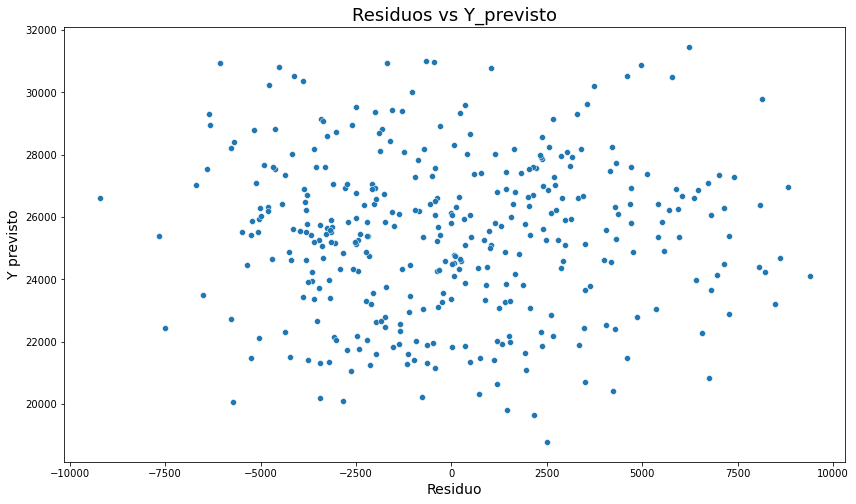

In [51]:
fig, ax = plt.subplots(figsize=(14,8))
ax.set_title('Residuos vs Y_previsto', fontsize=18)
ax.set_xlabel('Residuo', fontsize=14)
ax.set_ylabel('Y previsto', fontsize=14)
sns.scatterplot(x= 'residuo', y='Y_pred', data= df, ax=ax)
plt.show()

### Obtenha o QQPlot dos resíduos

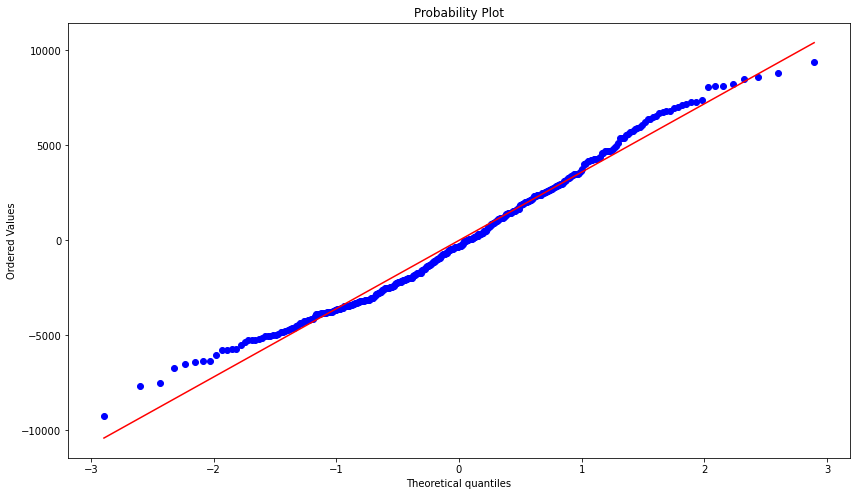

In [58]:
fig, ax = plt.subplots(figsize=(14, 8))
(_, (_, _, _)) = probplot(df.residuo, plot=ax)

### <font color='red'>A partir dos outputs acima, qual conclusão podemos tirar sobre o comportamento dos resíduos?</font>

### Obtenha o R² da regressão pelo método da soma dos quadrados

# $$R^2 = \frac{SQR}{SQT}$$

In [70]:
SQE = model.ssr
SQR

2325899486.7377872

In [71]:
SQR = model.ess
SQE

4718394688.067692

In [72]:
SQT = SQE + SQR
SQT

7044294174.805479

In [73]:
R2 = SQR/SQT
R2

0.33018204933243217

In [77]:
model.rsquared

0.3301820493324321